In [5]:
import pandas as pd
import numpy as np
import sys,os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from tabulate import tabulate
plt.style.use('ggplot')

# Definig the data path

In [7]:
df = pd.read_csv('../data/benin-malanville.csv')
data = pd.read_csv('../data/sierraleone-bumbuna.csv')
dt = pd.read_csv('../data/togo-dapaong_qc.csv')

# Checking the Data Types

In [84]:
df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [33]:
data.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [34]:
dt.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

# Checking the missing value

In [47]:
from IPython.display import display
missing_values = df.isnull().sum()
display("Missing Values In Benin-Malanville:")
display(missing_values)

'Missing Values In Benin-Malanville:'

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [48]:
from IPython.display import display
negative_values = df.loc[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)]
if not negative_values.empty:
    display("Negative Values Detected In Benin-Malanville:")
    display(negative_values)

'Negative Values Detected In Benin-Malanville:'

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0           0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1           0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2           0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3           0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4           0.3  113.2      1.0  997         0            0.0   26.4   26.3   
...         ...    ...      ...  ...       ...            ...    ...    ...   
525595      0.5  119.3      4.1  996         0            0.0   23.5   22.9   
525596      0.4  115.2      2.3  996         0            0.0   23.5   22.9   
525597      0.5  129.8      3.4  996         0            0.0   23.5   22.9   
525598      0.5  124.4      4.3  996         0            0.0   23.5   22.9   
525599      0.3  124.1      5.9  996         0            0.0   23.5   22.9   

        Comments  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
525595       NaN  
525596       NaN  
525597       NaN  
525598       NaN  
525599       NaN  

[278722 rows x 19 columns]

In [49]:
from IPython.display import display
missing_values = data.isnull().sum()
display("Missing Values In Sierraleone-Bumbuna:")
display(missing_values)

'Missing Values In Sierraleone-Bumbuna:'

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [50]:
from IPython.display import display
negative_values = data.loc[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)]
if not negative_values.empty:
    display("Negative Values Detected In Sierraleone-Bumbuna:")
    display(negative_values)

'Negative Values Detected In Sierraleone-Bumbuna:'

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
0       2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0     0.0   
1       2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2       2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
3       2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
4       2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
...                  ...  ...  ...  ...   ...   ...   ...    ...  ...     ...   
525595  2022-10-29 23:56 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0     0.0   
525596  2022-10-29 23:57 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0     0.0   
525597  2022-10-29 23:58 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0     0.0   
525598  2022-10-29 23:59 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0     0.0   
525599  2022-10-30 00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0     0.0   

        WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0           0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1           0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2           0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3           0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4           0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
...         ...  ...      ...   ...       ...            ...    ...    ...   
525595      0.0  0.0      0.0   999         0            0.0   24.2   24.5   
525596      0.0  0.0      0.0   999         0            0.0   24.2   24.5   
525597      0.0  0.0      0.0  1000         0            0.0   24.1   24.4   
525598      0.0  0.0      0.0  1000         0            0.0   24.1   24.4   
525599      0.0  0.0      0.0  1000         0            0.0   24.1   24.4   

        Comments  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
525595       NaN  
525596       NaN  
525597       NaN  
525598       NaN  
525599       NaN  

[278722 rows x 19 columns]

In [51]:
from IPython.display import display
missing_values = dt.isnull().sum()
display("Missing Values In Togo-Dapaong_Qc:")
display(missing_values)

'Missing Values In Togo-Dapaong_Qc:'

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [52]:
from IPython.display import display
negative_values = dt.loc[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)]
if not negative_values.empty:
    display("Negative Values Detected In Togo-Dapaong_Qc:")
    display(negative_values)

'Negative Values Detected In Togo-Dapaong_Qc:'

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1       2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2       2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3       2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4       2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

        WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0           0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1           0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2           0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3           0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4           0.4  227.5      1.6  977         0            0.0   24.7   24.4   
...         ...    ...      ...  ...       ...            ...    ...    ...   
525595      0.0    0.0      0.0  977         0            0.0   24.3   24.0   
525596      0.0    0.0      0.0  977         0            0.0   24.3   24.0   
525597      0.0    0.0      0.0  977         0            0.0   24.2   23.9   
525598      0.0    0.0      0.0  977         0            0.0   24.1   23.8   
525599      0.0    0.0      0.0  977         0            0.0   24.1   23.8   

        Comments  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
525595       NaN  
525596       NaN  
525597       NaN  
525598       NaN  
525599       NaN  

[278722 rows x 19 columns]

# Summary Statistics

In [75]:
from IPython.display import display
summary_stats = df.describe()
display("Summary Statistics for Benin-Malanville")
display(summary_stats)

'Summary Statistics for Benin-Malanville'

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.900000      32.300000      80.100000       3.100000   
max      1342.300000      43.800000     100.000000      19.500000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        2.809195       0.473390     153.435172       8.582407   
std         2.029120       0.273395     102.332842       6.385864   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      59.000000       3.700000   
50%         2.600000       0.500000     181.000000       8.600000   
75%         4.100000       0.600000     235.100000      12.300000   
max        26.600000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      994.197199       0.000923       0.001905      35.246026   
std         2.474993       0.030363       0.037115      14.807258   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      30.000000   
75%       996.000000       0.000000       0.000000      46.900000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.471736       NaN  
std        12.348743       NaN  
min         8.100000       NaN  
25%        23.600000       NaN  
50%        28.900000       NaN  
75%        41.500000       NaN  
max        72.500000       NaN

In [54]:
from IPython.display import display
summary_stats = data.describe()
display("Summary Statistics for Sierraleone-Bumbuna")
display(summary_stats)

'Summary Statistics for Sierraleone-Bumbuna'

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.100000      68.700000       0.000000   
50%         3.400000      25.300000      85.400000       0.800000   
75%       345.400000      29.400000      96.700000       2.000000   
max      1473.000000      39.900000     100.000000      19.200000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        1.691606       0.363823     133.044668       7.172220   
std         1.617053       0.295000     114.284792       7.535093   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.600000       0.400000     161.500000       6.200000   
75%         2.600000       0.600000     234.100000      12.000000   
max        23.900000       4.100000     360.000000      98.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      999.876469       0.000967       0.004806      32.504263   
std         2.104419       0.031074       0.047556      12.434899   
min       993.000000       0.000000       0.000000      10.700000   
25%       999.000000       0.000000       0.000000      23.500000   
50%      1000.000000       0.000000       0.000000      26.600000   
75%      1001.000000       0.000000       0.000000      40.900000   
max      1006.000000       1.000000       2.400000      72.800000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.593091       NaN  
std        12.009161       NaN  
min        11.100000       NaN  
25%        23.800000       NaN  
50%        26.900000       NaN  
75%        41.300000       NaN  
max        70.400000       NaN

In [55]:
from IPython.display import display
summary_stats = dt.describe()
display("Summary Statistics for Togo-Dapaong_Qc")
display(summary_stats)

'Summary Statistics for Togo-Dapaong_Qc'

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.200000      26.500000       1.400000   
50%         4.300000      27.200000      59.300000       2.200000   
75%       411.000000      31.100000      80.800000       3.200000   
max      1367.000000      41.400000      99.800000      16.100000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        3.229490       0.557740     161.741845      10.559568   
std         1.882565       0.268923      91.877217       5.915490   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.900000       0.400000      74.800000       6.900000   
50%         2.900000       0.500000     199.100000      10.800000   
75%         4.400000       0.700000     233.500000      14.100000   
max        23.100000       4.700000     360.000000      86.900000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      975.915242       0.000535       0.001382      32.444403   
std         2.153977       0.023116       0.026350      10.998334   
min       968.000000       0.000000       0.000000      13.100000   
25%       975.000000       0.000000       0.000000      23.900000   
50%       976.000000       0.000000       0.000000      28.400000   
75%       977.000000       0.000000       0.000000      40.600000   
max       983.000000       1.000000       2.300000      70.400000   

               TModB  Comments  
count  525600.000000       0.0  
mean       33.543330       NaN  
std        12.769277       NaN  
min        13.100000       NaN  
25%        23.600000       NaN  
50%        28.400000       NaN  
75%        43.000000       NaN  
max        94.600000       NaN

# Checking Duplicate values

In [38]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
525595    False
525596    False
525597    False
525598    False
525599    False
Length: 525600, dtype: bool

In [39]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
525595    False
525596    False
525597    False
525598    False
525599    False
Length: 525600, dtype: bool

In [40]:
dt.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
525595    False
525596    False
525597    False
525598    False
525599    False
Length: 525600, dtype: bool

# Correlation Analysis

Correlation Analysis for Benin-Malanville


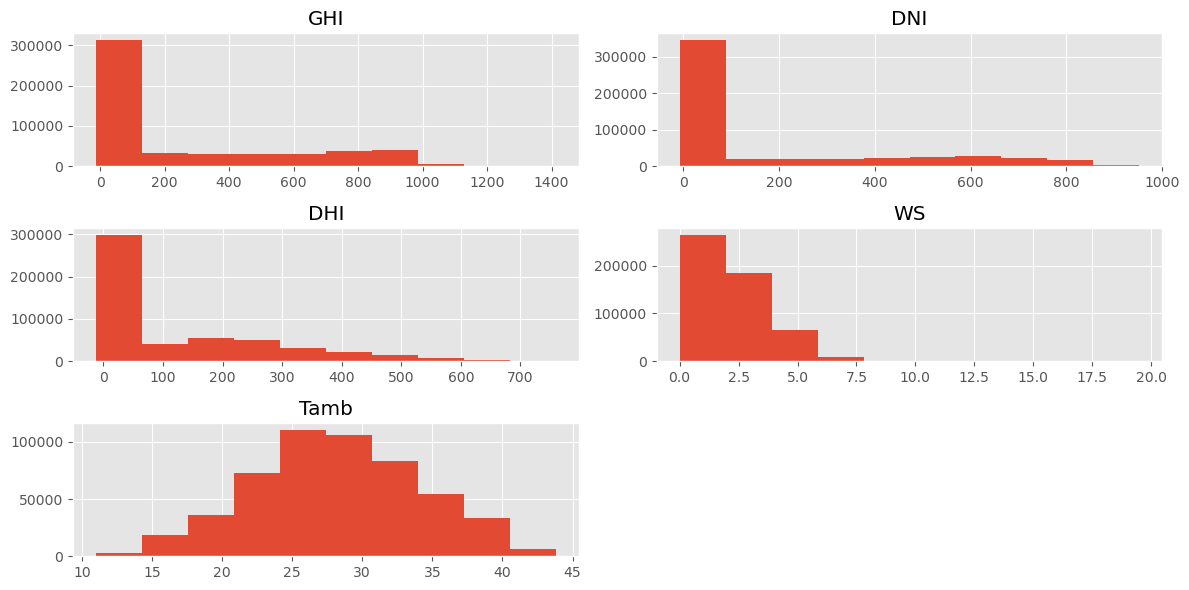

In [56]:
df[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(bins=10, figsize=(12, 6))
plt.tight_layout()
print("Correlation Analysis for Benin-Malanville")
plt.show()

Correlation Analysis for Sierraleone-Bumbuna


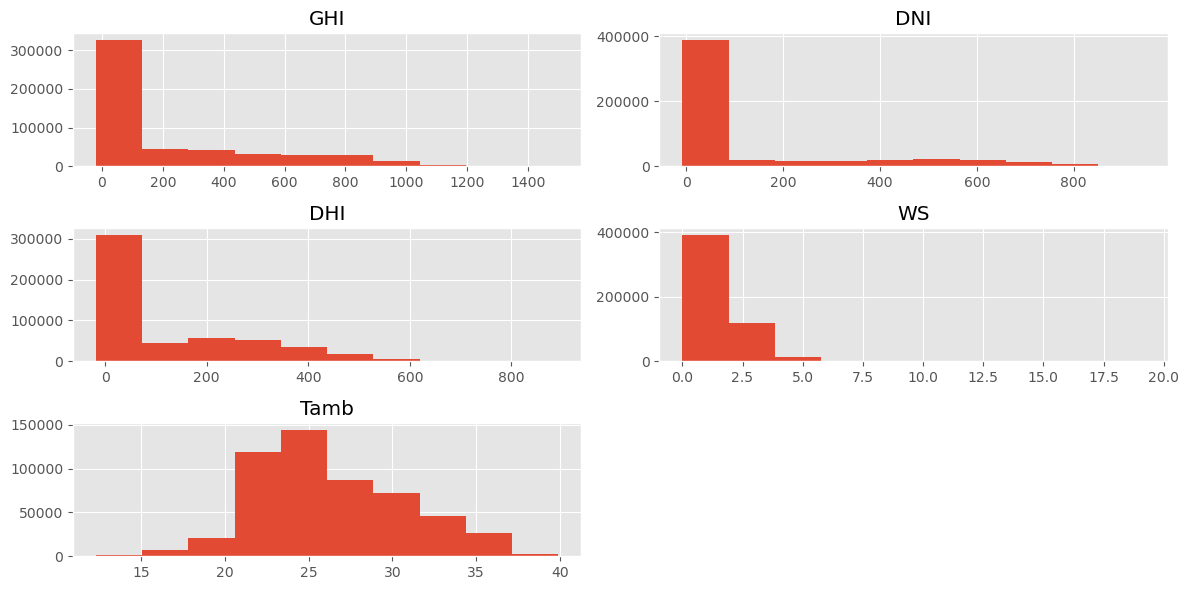

In [57]:
data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(bins=10, figsize=(12, 6))
plt.tight_layout()
print("Correlation Analysis for Sierraleone-Bumbuna")
plt.show()

Correlation Analysis for Togo-Dapaong_Qc


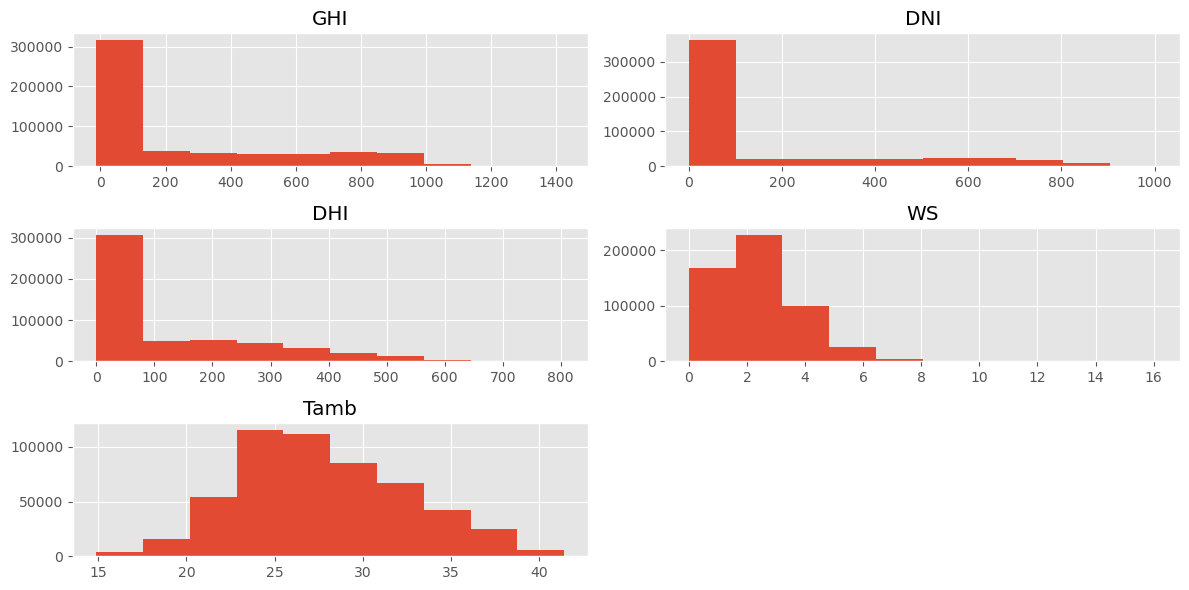

In [58]:
dt[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(bins=10, figsize=(12, 6))
plt.tight_layout()
print("Correlation Analysis for Togo-Dapaong_Qc")
plt.show()

# Box Plot Analysis

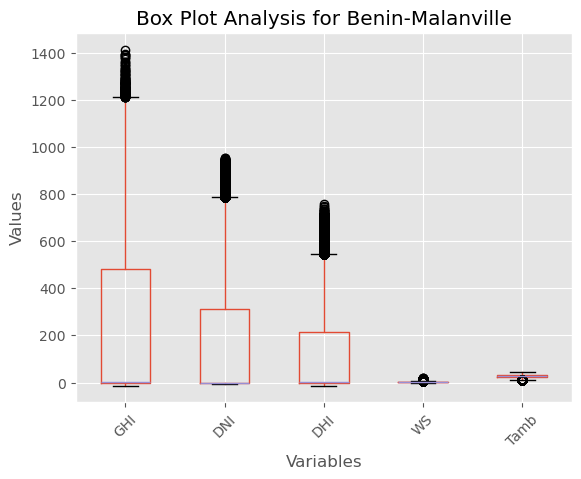

In [59]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
selected_data = df[variables]

# Creating a box plot for each variable
selected_data.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot Analysis for Benin-Malanville')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()

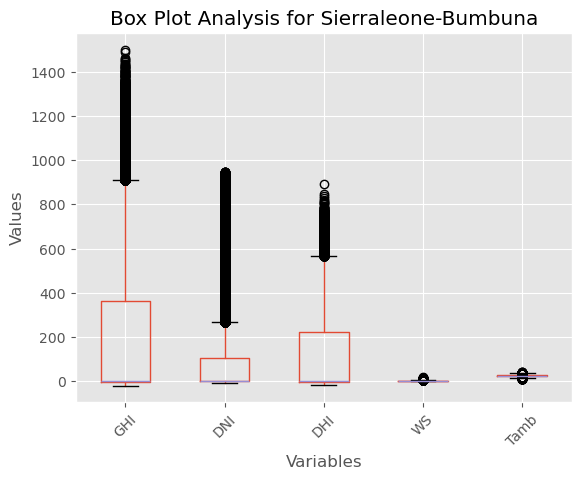

In [60]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
selected_data = data[variables]

# Creating a box plot for each variable
selected_data.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot Analysis for Sierraleone-Bumbuna')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()

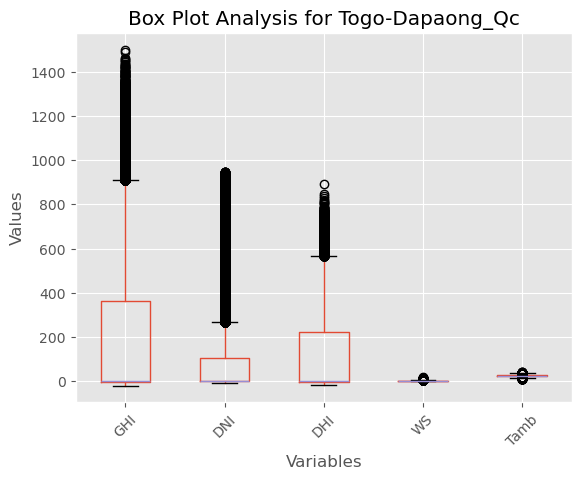

In [61]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
selected_data = data[variables]

# Creating a box plot for each variable
selected_data.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot Analysis for Togo-Dapaong_Qc')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()

# Time Series Analysis

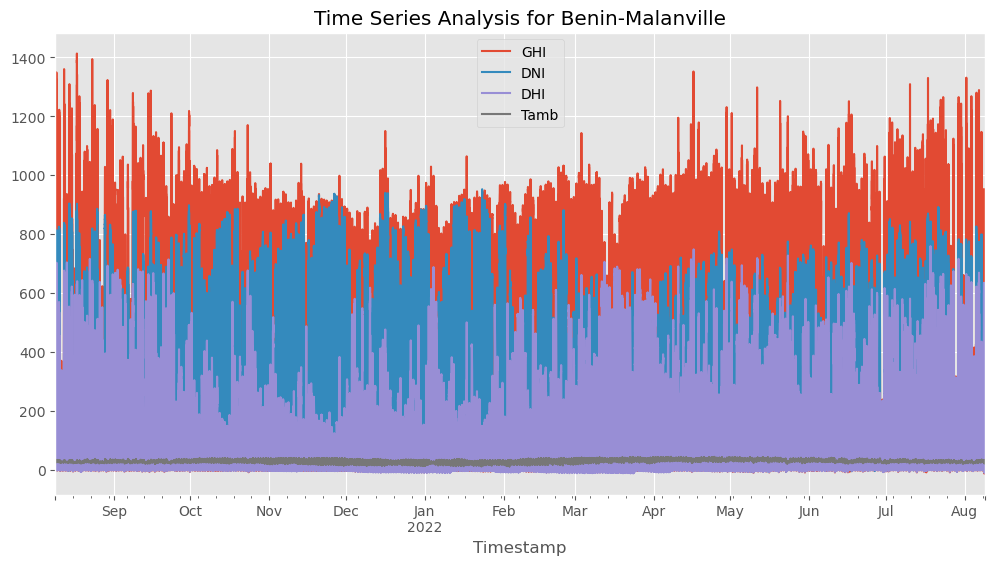

In [62]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12, 6))
plt.title("Time Series Analysis for Benin-Malanville")
plt.show()

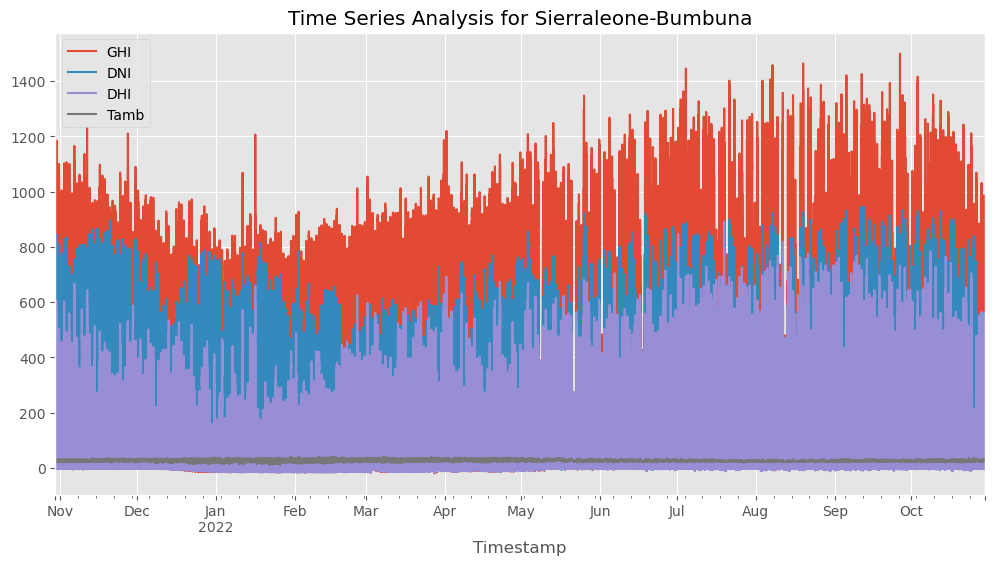

In [63]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)
data[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12, 6))
plt.title("Time Series Analysis for Sierraleone-Bumbuna")
plt.show()

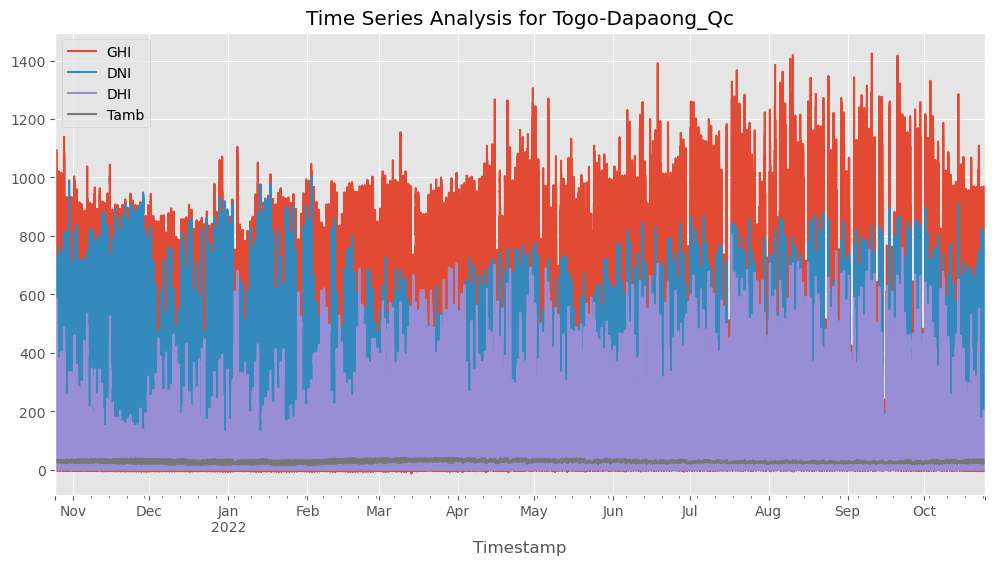

In [64]:
dt['Timestamp'] = pd.to_datetime(dt['Timestamp'])
dt.set_index('Timestamp', inplace=True)
dt[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12, 6))
plt.title("Time Series Analysis for Togo-Dapaong_Qc")
plt.show()

# Correlation Analysis GHI vs Tamb

Correlation Analysis for Benin-Malanville


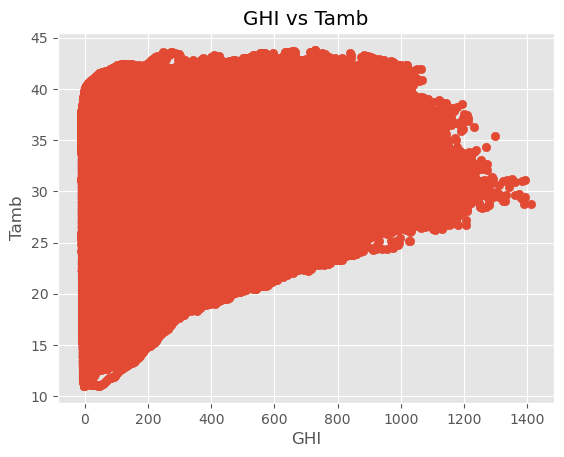

In [67]:
plt.scatter(df['GHI'], df['Tamb'])
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb')
print("Correlation Analysis for Benin-Malanville")
plt.show()

Correlation Analysis for Sierraleone-Bumbuna


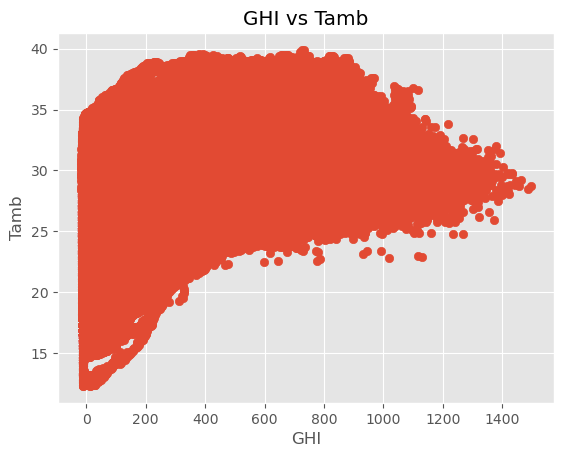

In [68]:
plt.scatter(data['GHI'], data['Tamb'])
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb')
print("Correlation Analysis for Sierraleone-Bumbuna")
plt.show()

Correlation Analysis for Togo-Dapaong_Qc


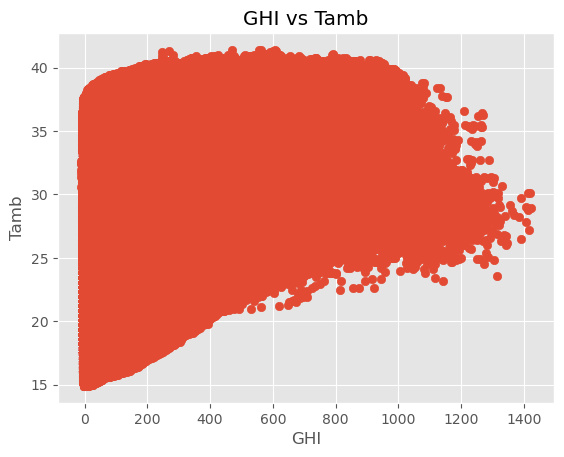

In [69]:
plt.scatter(dt['GHI'], dt['Tamb'])
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb')
print("Correlation Analysis for Togo-Dapaong_Qc")
plt.show()

# Correlation Matrix

In [87]:
from IPython.display import display
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
correlation_matrix = df.corr()
display("Correlation Matrix for Benin-Malanville:")
display(correlation_matrix)

'Correlation Matrix for Benin-Malanville:'

Timestamp       GHI       DNI       DHI      ModA      ModB  \
Timestamp       1.000000  0.009829 -0.057211  0.065665 -0.024666 -0.027620   
GHI             0.009829  1.000000  0.882376  0.849989  0.994443  0.994869   
DNI            -0.057211  0.882376  1.000000  0.546602  0.892023  0.892012   
DHI             0.065665  0.849989  0.546602  1.000000  0.829923  0.827886   
ModA           -0.024666  0.994443  0.892023  0.829923  1.000000  0.998745   
ModB           -0.027620  0.994869  0.892012  0.827886  0.998745  1.000000   
Tamb            0.193871  0.547513  0.467584  0.503925  0.526868  0.525370   
RH             -0.105567 -0.360029 -0.373475 -0.285018 -0.383205 -0.365718   
WS              0.218608  0.457349  0.397099  0.426959  0.458483  0.450123   
WSgust          0.218099  0.484144  0.419469  0.450904  0.484429  0.476380   
WSstdev         0.175579  0.446526  0.383303  0.414711  0.443467  0.438523   
WD              0.167194  0.079664  0.018839  0.102752  0.050262  0.061473   
WDstdev         0.167405  0.547242  0.471152  0.505968  0.538341  0.538331   
BP             -0.156383  0.016913  0.029967 -0.009028  0.038301  0.039817   
Cleaning        0.001741  0.007001  0.009934  0.013086  0.006567  0.007017   
Precipitation   0.009922 -0.036387 -0.032781 -0.035466 -0.035919 -0.035852   
TModA           0.066738  0.920127  0.790340  0.825012  0.908981  0.912114   
TModB           0.077549  0.874338  0.756007  0.777829  0.856101  0.862234   
Comments             NaN       NaN       NaN       NaN       NaN       NaN   

                   Tamb        RH        WS    WSgust   WSstdev        WD  \
Timestamp      0.193871 -0.105567  0.218608  0.218099  0.175579  0.167194   
GHI            0.547513 -0.360029  0.457349  0.484144  0.446526  0.079664   
DNI            0.467584 -0.373475  0.397099  0.419469  0.383303  0.018839   
DHI            0.503925 -0.285018  0.426959  0.450904  0.414711  0.102752   
ModA           0.526868 -0.383205  0.458483  0.484429  0.443467  0.050262   
ModB           0.525370 -0.365718  0.450123  0.476380  0.438523  0.061473   
Tamb           1.000000 -0.414842  0.347188  0.362403  0.342418  0.188081   
RH            -0.414842  1.000000 -0.244108 -0.236497 -0.177058  0.282531   
WS             0.347188 -0.244108  1.000000  0.984599  0.766948  0.238566   
WSgust         0.362403 -0.236497  0.984599  1.000000  0.841055  0.257456   
WSstdev        0.342418 -0.177058  0.766948  0.841055  1.000000  0.363990   
WD             0.188081  0.282531  0.238566  0.257456  0.363990  1.000000   
WDstdev        0.469857 -0.218386  0.519071  0.568864  0.618606  0.301671   
BP            -0.553705  0.284643  0.040233  0.039512  0.015536 -0.136511   
Cleaning      -0.010058  0.006437  0.007822  0.008475  0.007977  0.004726   
Precipitation -0.045705  0.073785  0.126718  0.128566  0.105187 -0.012247   
TModA          0.761701 -0.343841  0.429899  0.458782  0.440687  0.164692   
TModB          0.823353 -0.319846  0.400509  0.430020  0.423140  0.205442   
Comments            NaN       NaN       NaN       NaN       NaN       NaN   

                WDstdev        BP  Cleaning  Precipitation     TModA  \
Timestamp      0.167405 -0.156383  0.001741       0.009922  0.066738   
GHI            0.547242  0.016913  0.007001      -0.036387  0.920127   
DNI            0.471152  0.029967  0.009934      -0.032781  0.790340   
DHI            0.505968 -0.009028  0.013086      -0.035466  0.825012   
ModA           0.538341  0.038301  0.006567      -0.035919  0.908981   
ModB           0.538331  0.039817  0.007017      -0.035852  0.912114   
Tamb           0.469857 -0.553705 -0.010058      -0.045705  0.761701   
RH            -0.218386  0.284643  0.006437       0.073785 -0.343841   
WS             0.519071  0.040233  0.007822       0.126718  0.429899   
WSgust         0.568864  0.039512  0.008475       0.128566  0.458782   
WSstdev        0.618606  0.015536  0.007977       0.105187  0.440687   
WD             0.301671 -0.136511  0.004726      

In [88]:
from IPython.display import display
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
correlation_matrix = data.corr()
display("Correlation Matrix for Sierraleone-Bumbuna:")
display(correlation_matrix)

'Correlation Matrix for Sierraleone-Bumbuna:'

Timestamp       GHI       DNI       DHI      ModA      ModB  \
Timestamp       1.000000 -0.035870 -0.158863  0.075887 -0.072786 -0.067364   
GHI            -0.035870  1.000000  0.869108  0.865815  0.995052  0.994614   
DNI            -0.158863  0.869108  1.000000  0.536710  0.876465  0.874956   
DHI             0.075887  0.865815  0.536710  1.000000  0.850255  0.850799   
ModA           -0.072786  0.995052  0.876465  0.850255  1.000000  0.999127   
ModB           -0.067364  0.994614  0.874956  0.850799  0.999127  1.000000   
Tamb           -0.098897  0.641261  0.578346  0.568655  0.637249  0.633820   
RH              0.368547 -0.546677 -0.548800 -0.431910 -0.564704 -0.557814   
WS             -0.028135  0.371309  0.311493  0.347216  0.366454  0.364795   
WSgust         -0.015236  0.411449  0.342094  0.385978  0.406698  0.404979   
WSstdev        -0.013082  0.412536  0.338732  0.390400  0.409789  0.408429   
WD              0.028350  0.404333  0.315941  0.403761  0.394293  0.394065   
WDstdev        -0.058528  0.542041  0.471341  0.480960  0.544326  0.542186   
BP              0.346352 -0.140519 -0.214597 -0.060303 -0.144652 -0.139502   
Cleaning        0.002425  0.008713  0.002670  0.018071  0.006891  0.008518   
Precipitation   0.081788 -0.062497 -0.053565 -0.061906 -0.062532 -0.062370   
TModA          -0.087285  0.923092  0.816449  0.808479  0.928274  0.926682   
TModB          -0.079550  0.912260  0.808194  0.807551  0.912975  0.911693   
Comments             NaN       NaN       NaN       NaN       NaN       NaN   

                   Tamb        RH        WS    WSgust   WSstdev        WD  \
Timestamp     -0.098897  0.368547 -0.028135 -0.015236 -0.013082  0.028350   
GHI            0.641261 -0.546677  0.371309  0.411449  0.412536  0.404333   
DNI            0.578346 -0.548800  0.311493  0.342094  0.338732  0.315941   
DHI            0.568655 -0.431910  0.347216  0.385978  0.390400  0.403761   
ModA           0.637249 -0.564704  0.366454  0.406698  0.409789  0.394293   
ModB           0.633820 -0.557814  0.364795  0.404979  0.408429  0.394065   
Tamb           1.000000 -0.791937  0.539170  0.557139  0.483964  0.491221   
RH            -0.791937  1.000000 -0.471197 -0.483660 -0.416384 -0.348679   
WS             0.539170 -0.471197  1.000000  0.973939  0.730147  0.566228   
WSgust         0.557139 -0.483660  0.973939  1.000000  0.840639  0.627186   
WSstdev        0.483964 -0.416384  0.730147  0.840639  1.000000  0.693726   
WD             0.491221 -0.348679  0.566228  0.627186  0.693726  1.000000   
WDstdev        0.572179 -0.509696  0.643085  0.700010  0.724452  0.592488   
BP            -0.511430  0.571448 -0.291319 -0.276157 -0.191222 -0.181143   
Cleaning      -0.011219  0.010497 -0.013065 -0.011569 -0.006563 -0.008514   
Precipitation -0.063231  0.082483  0.125083  0.129594  0.098419  0.021791   
TModA          0.831892 -0.688057  0.435944  0.474257  0.462751  0.459756   
TModB          0.855149 -0.698477  0.455200  0.490846  0.469503  0.482911   
Comments            NaN       NaN       NaN       NaN       NaN       NaN   

                WDstdev        BP  Cleaning  Precipitation     TModA  \
Timestamp     -0.058528  0.346352  0.002425       0.081788 -0.087285   
GHI            0.542041 -0.140519  0.008713      -0.062497  0.923092   
DNI            0.471341 -0.214597  0.002670      -0.053565  0.816449   
DHI            0.480960 -0.060303  0.018071      -0.061906  0.808479   
ModA           0.544326 -0.144652  0.006891      -0.062532  0.928274   
ModB           0.542186 -0.139502  0.008518      -0.062370  0.926682   
Tamb           0.572179 -0.511430 -0.011219      -0.063231  0.831892   
RH            -0.509696  0.571448  0.010497       0.082483 -0.688057   
WS             0.643085 -0.291319 -0.013065       0.125083  0.435944   
WSgust         0.700010 -0.276157 -0.011569       0.129594  0.474257   
WSstdev        0.724452 -0.191222 -0.006563       0.098419  0.462751   
WD             0.592488 -0.181143 -0.008514      

In [89]:
from IPython.display import display
dt['Timestamp'] = pd.to_datetime(dt['Timestamp'])
correlation_matrix = dt.corr()
display("Correlation Matrix for Togo-Dapaong_Qc:")
display(correlation_matrix)

'Correlation Matrix for Togo-Dapaong_Qc:'

Timestamp       GHI       DNI       DHI      ModA      ModB  \
Timestamp       1.000000 -0.045848 -0.171813  0.055782 -0.081818 -0.074323   
GHI            -0.045848  1.000000  0.877293  0.852080  0.994964  0.995439   
DNI            -0.171813  0.877293  1.000000  0.532717  0.889702  0.889708   
DHI             0.055782  0.852080  0.532717  1.000000  0.833037  0.832648   
ModA           -0.081818  0.994964  0.889702  0.833037  1.000000  0.999564   
ModB           -0.074323  0.995439  0.889708  0.832648  0.999564  1.000000   
Tamb           -0.151706  0.562533  0.504499  0.489758  0.561114  0.556133   
RH              0.711630 -0.258077 -0.327887 -0.155016 -0.287038 -0.280072   
WS             -0.074907  0.421698  0.366667  0.390597  0.420344  0.421543   
WSgust         -0.050330  0.443923  0.384870  0.410531  0.442563  0.443570   
WSstdev         0.013985  0.399646  0.343437  0.367005  0.398559  0.398978   
WD              0.355868  0.089896 -0.017950  0.154095  0.057154  0.061090   
WDstdev         0.035180  0.479291  0.397511  0.454318  0.472525  0.472106   
BP              0.157959  0.059116  0.047465  0.052307  0.064175  0.068740   
Cleaning       -0.000136  0.024725  0.019777  0.026179  0.022523  0.023482   
Precipitation   0.046433 -0.034598 -0.031397 -0.033330 -0.034314 -0.034269   
TModA          -0.018585  0.898211  0.765881  0.802319  0.886888  0.885551   
TModB          -0.011126  0.919220  0.783572  0.820360  0.906796  0.906427   
Comments             NaN       NaN       NaN       NaN       NaN       NaN   

                   Tamb        RH        WS    WSgust   WSstdev        WD  \
Timestamp     -0.151706  0.711630 -0.074907 -0.050330  0.013985  0.355868   
GHI            0.562533 -0.258077  0.421698  0.443923  0.399646  0.089896   
DNI            0.504499 -0.327887  0.366667  0.384870  0.343437 -0.017950   
DHI            0.489758 -0.155016  0.390597  0.410531  0.367005  0.154095   
ModA           0.561114 -0.287038  0.420344  0.442563  0.398559  0.057154   
ModB           0.556133 -0.280072  0.421543  0.443570  0.398978  0.061090   
Tamb           1.000000 -0.400410  0.197145  0.221104  0.227084  0.094900   
RH            -0.400410  1.000000 -0.147589 -0.131119 -0.075714  0.521269   
WS             0.197145 -0.147589  1.000000  0.977587  0.728018  0.164655   
WSgust         0.221104 -0.131119  0.977587  1.000000  0.827358  0.185546   
WSstdev        0.227084 -0.075714  0.728018  0.827358  1.000000  0.240927   
WD             0.094900  0.521269  0.164655  0.185546  0.240927  1.000000   
WDstdev        0.361367 -0.075874  0.505133  0.562013  0.593584  0.281328   
BP            -0.520770  0.225176  0.087915  0.085957  0.065415 -0.074086   
Cleaning       0.019391 -0.007095  0.008371  0.009440  0.010888  0.004054   
Precipitation -0.060178  0.068177  0.099562  0.107898  0.105231 -0.014130   
TModA          0.805580 -0.244825  0.328273  0.357374  0.345920  0.199702   
TModB          0.740832 -0.224668  0.353334  0.380626  0.359923  0.198834   
Comments            NaN       NaN       NaN       NaN       NaN       NaN   

                WDstdev        BP  Cleaning  Precipitation     TModA  \
Timestamp      0.035180  0.157959 -0.000136       0.046433 -0.018585   
GHI            0.479291  0.059116  0.024725      -0.034598  0.898211   
DNI            0.397511  0.047465  0.019777      -0.031397  0.765881   
DHI            0.454318  0.052307  0.026179      -0.033330  0.802319   
ModA           0.472525  0.064175  0.022523      -0.034314  0.886888   
ModB           0.472106  0.068740  0.023482      -0.034269  0.885551   
Tamb           0.361367 -0.520770  0.019391      -0.060178  0.805580   
RH            -0.075874  0.225176 -0.007095       0.068177 -0.244825   
WS             0.505133  0.087915  0.008371       0.099562  0.328273   
WSgust         0.562013  0.085957  0.009440       0.107898  0.357374   
WSstdev        0.593584  0.065415  0.010888       0.105231  0.345920   
WD             0.281328 -0.074086  0.004054      

# Wind Speed Analysis

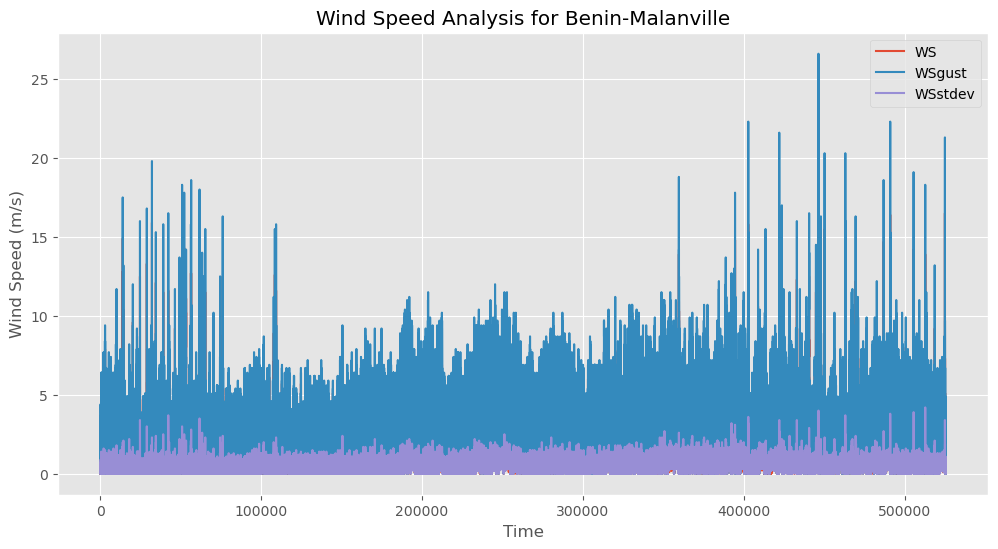

In [90]:
df[['WS', 'WSgust', 'WSstdev']].plot(figsize=(12, 6))
plt.title('Wind Speed Analysis for Benin-Malanville')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.show()

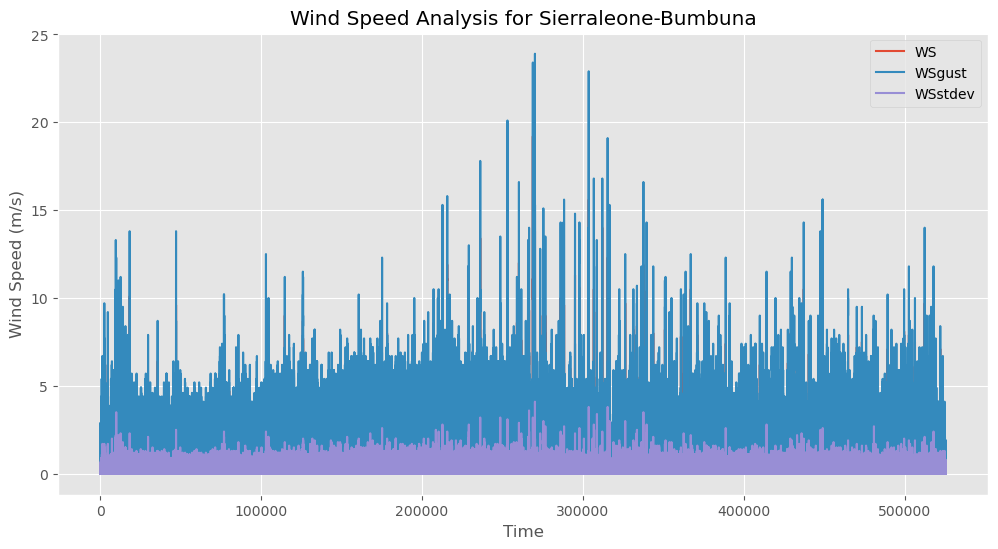

In [91]:
data[['WS', 'WSgust', 'WSstdev']].plot(figsize=(12, 6))
plt.title('Wind Speed Analysis for Sierraleone-Bumbuna')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.show()

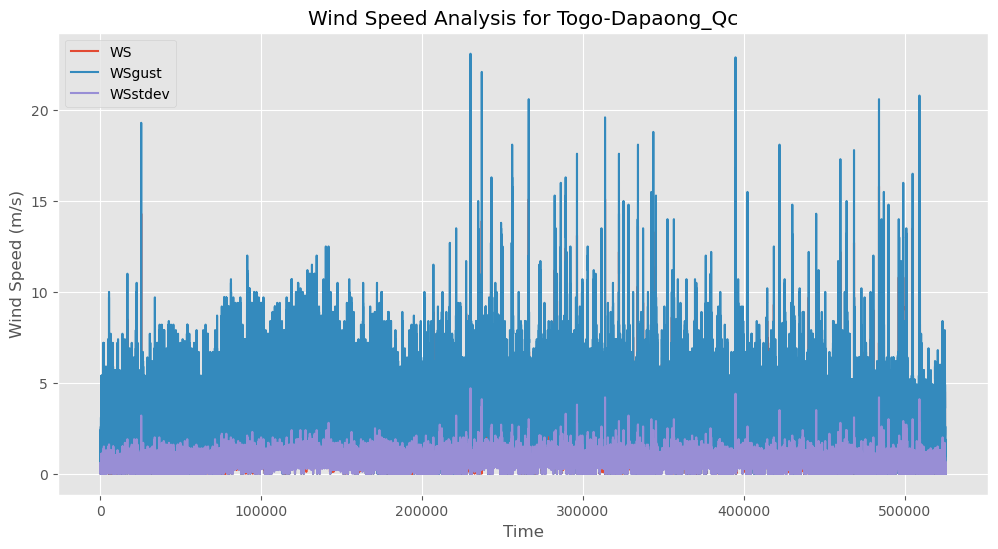

In [92]:
dt[['WS', 'WSgust', 'WSstdev']].plot(figsize=(12, 6))
plt.title('Wind Speed Analysis for Togo-Dapaong_Qc')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.show()

# Wind Direction Analysis

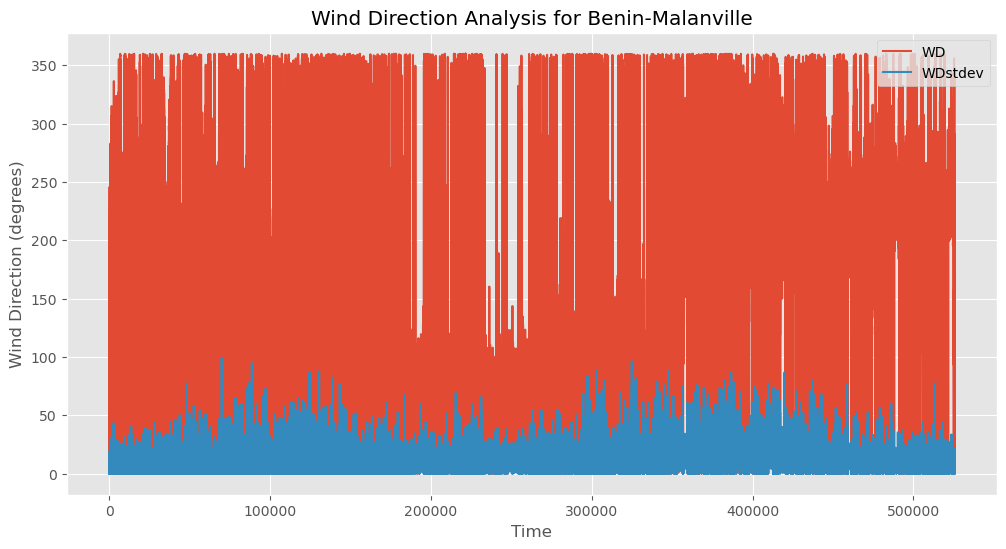

In [93]:
df[['WD', 'WDstdev']].plot(figsize=(12, 6))
plt.title('Wind Direction Analysis for Benin-Malanville')
plt.xlabel('Time')
plt.ylabel('Wind Direction (degrees)')
plt.show()

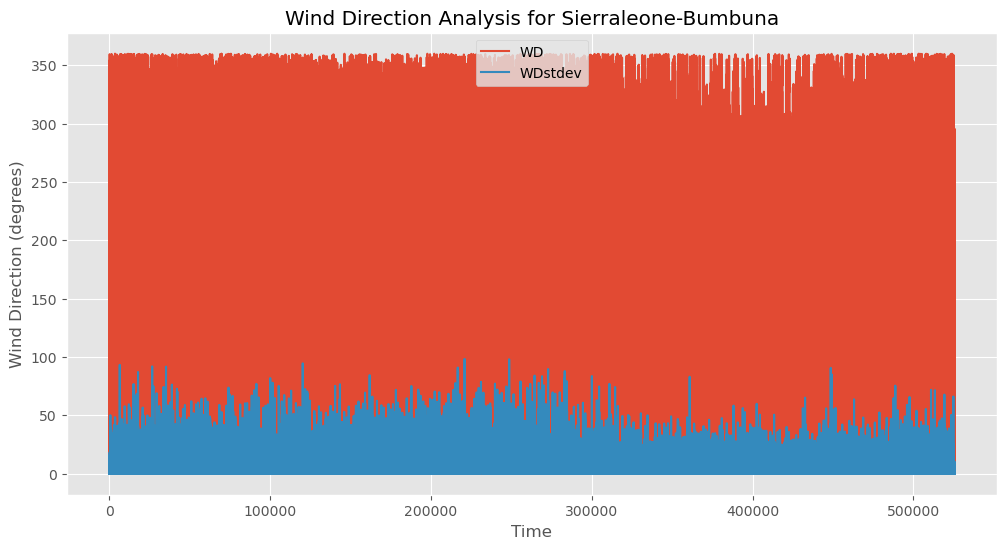

In [94]:
data[['WD', 'WDstdev']].plot(figsize=(12, 6))
plt.title('Wind Direction Analysis for Sierraleone-Bumbuna')
plt.xlabel('Time')
plt.ylabel('Wind Direction (degrees)')
plt.show()

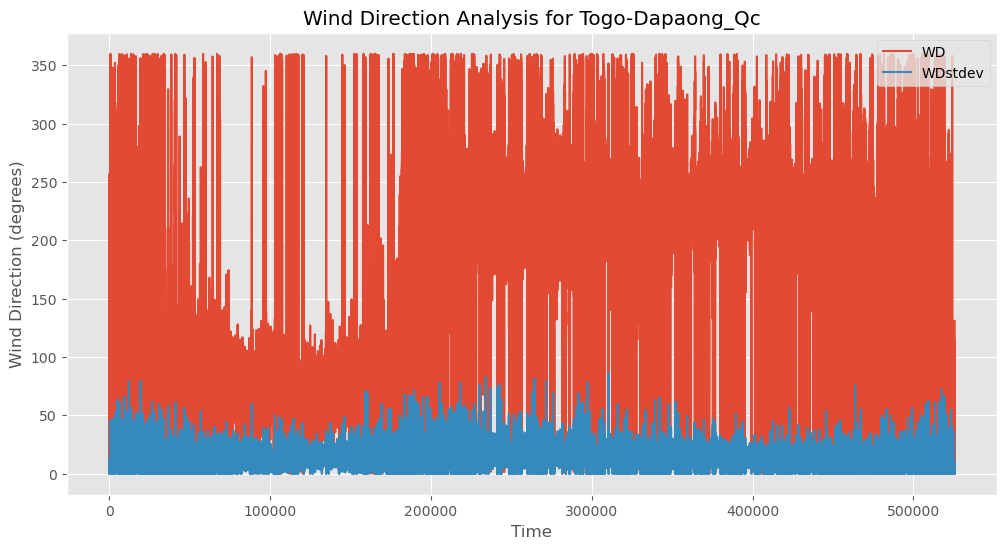

In [95]:
dt[['WD', 'WDstdev']].plot(figsize=(12, 6))
plt.title('Wind Direction Analysis for Togo-Dapaong_Qc')
plt.xlabel('Time')
plt.ylabel('Wind Direction (degrees)')
plt.show()

# Temperature Analysis

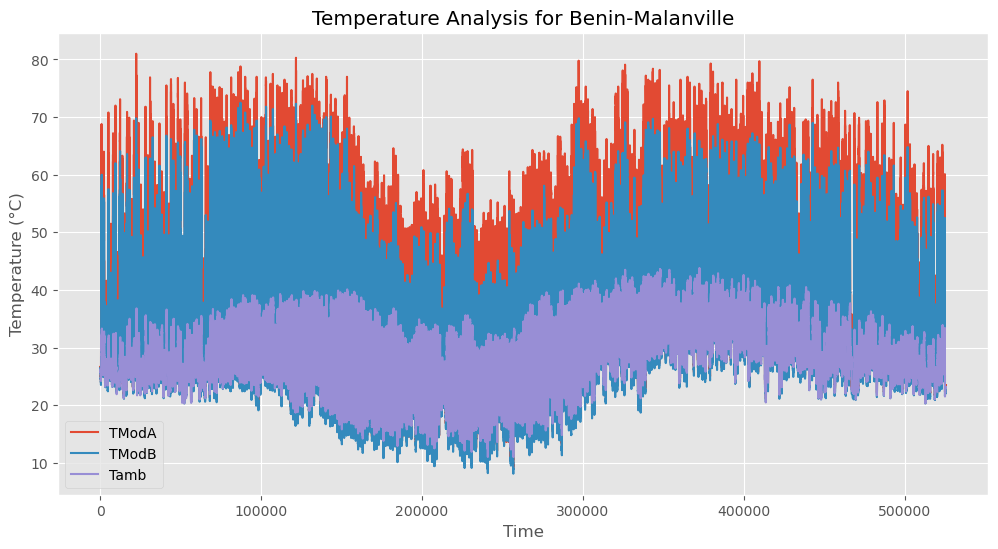

In [96]:
df[['TModA', 'TModB', 'Tamb']].plot(figsize=(12, 6))
plt.title('Temperature Analysis for Benin-Malanville')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.show()

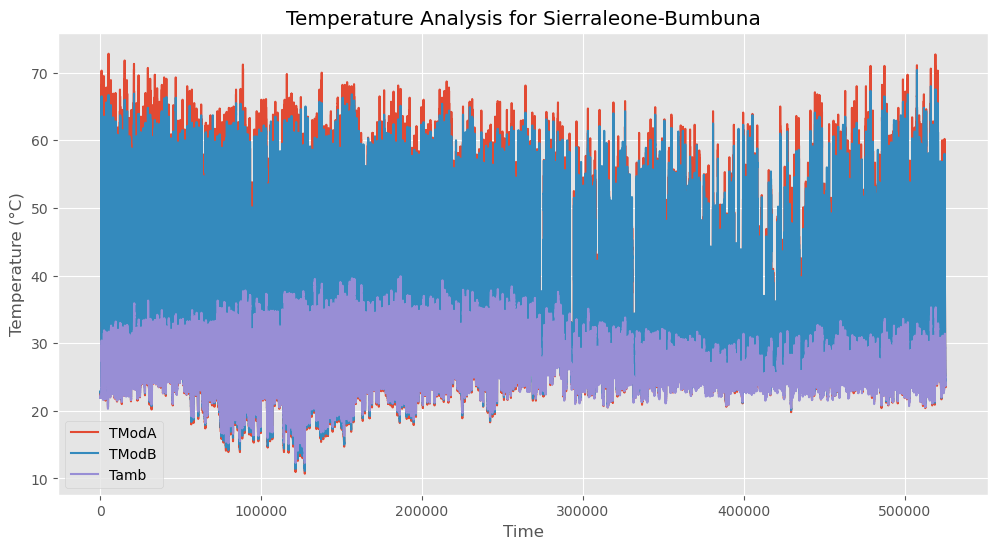

In [97]:
data[['TModA', 'TModB', 'Tamb']].plot(figsize=(12, 6))
plt.title('Temperature Analysis for Sierraleone-Bumbuna')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.show()

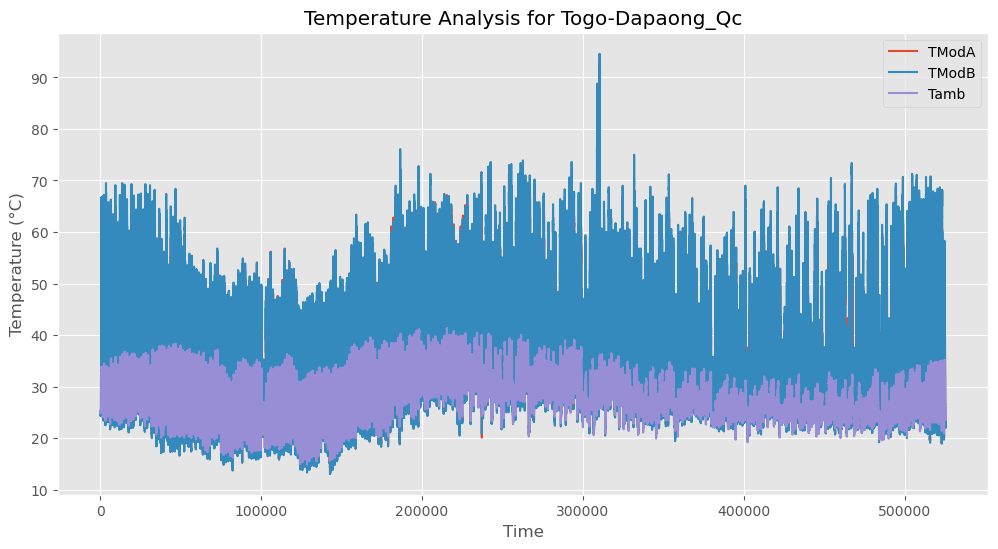

In [98]:
dt[['TModA', 'TModB', 'Tamb']].plot(figsize=(12, 6))
plt.title('Temperature Analysis for Togo-Dapaong_Qc')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.show()

# Comparison of Module Temperatures with Ambient Temperature

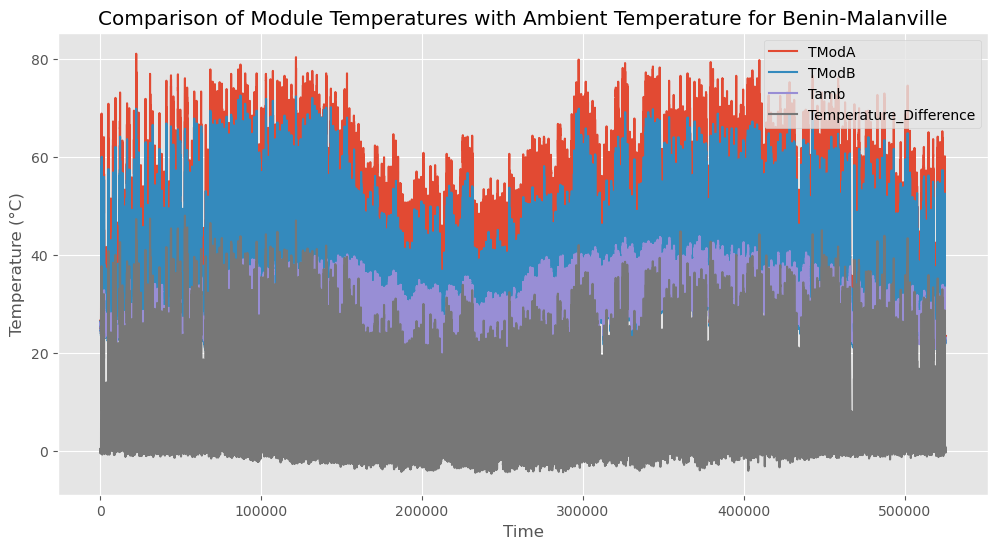

In [107]:
df['Temperature_Difference'] = df['TModA'] - df['Tamb']
df[['TModA', 'TModB', 'Tamb', 'Temperature_Difference']].plot(figsize=(12, 6))
plt.title('Comparison of Module Temperatures with Ambient Temperature for Benin-Malanville')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

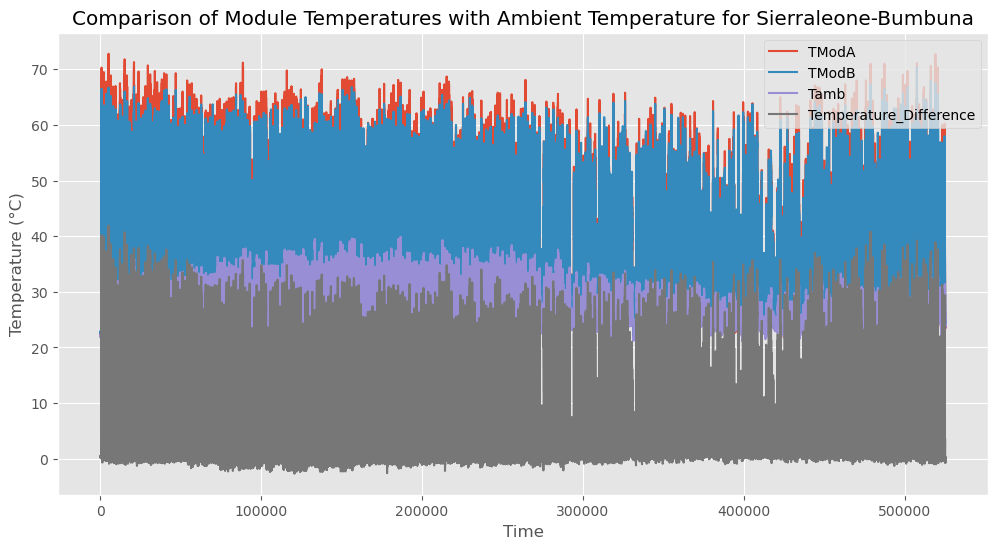

In [106]:
data['Temperature_Difference'] = data['TModA'] - data['Tamb']
data[['TModA', 'TModB', 'Tamb', 'Temperature_Difference']].plot(figsize=(12, 6))
plt.title('Comparison of Module Temperatures with Ambient Temperature for Sierraleone-Bumbuna')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

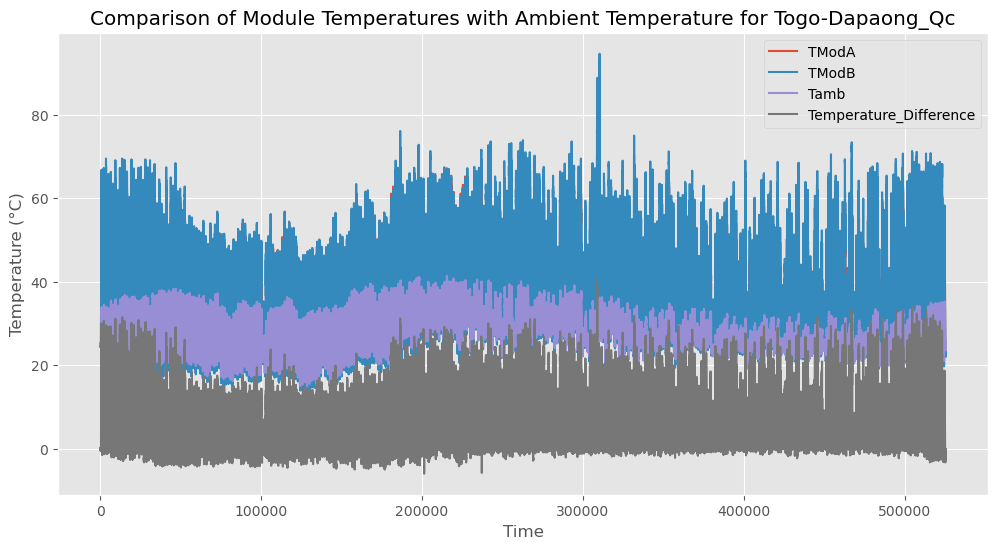

In [105]:
dt['Temperature_Difference'] = dt['TModA'] - dt['Tamb']
dt[['TModA', 'TModB', 'Tamb', 'Temperature_Difference']].plot(figsize=(12, 6))
plt.title('Comparison of Module Temperatures with Ambient Temperature for Togo-Dapaong_Qc')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Histograms

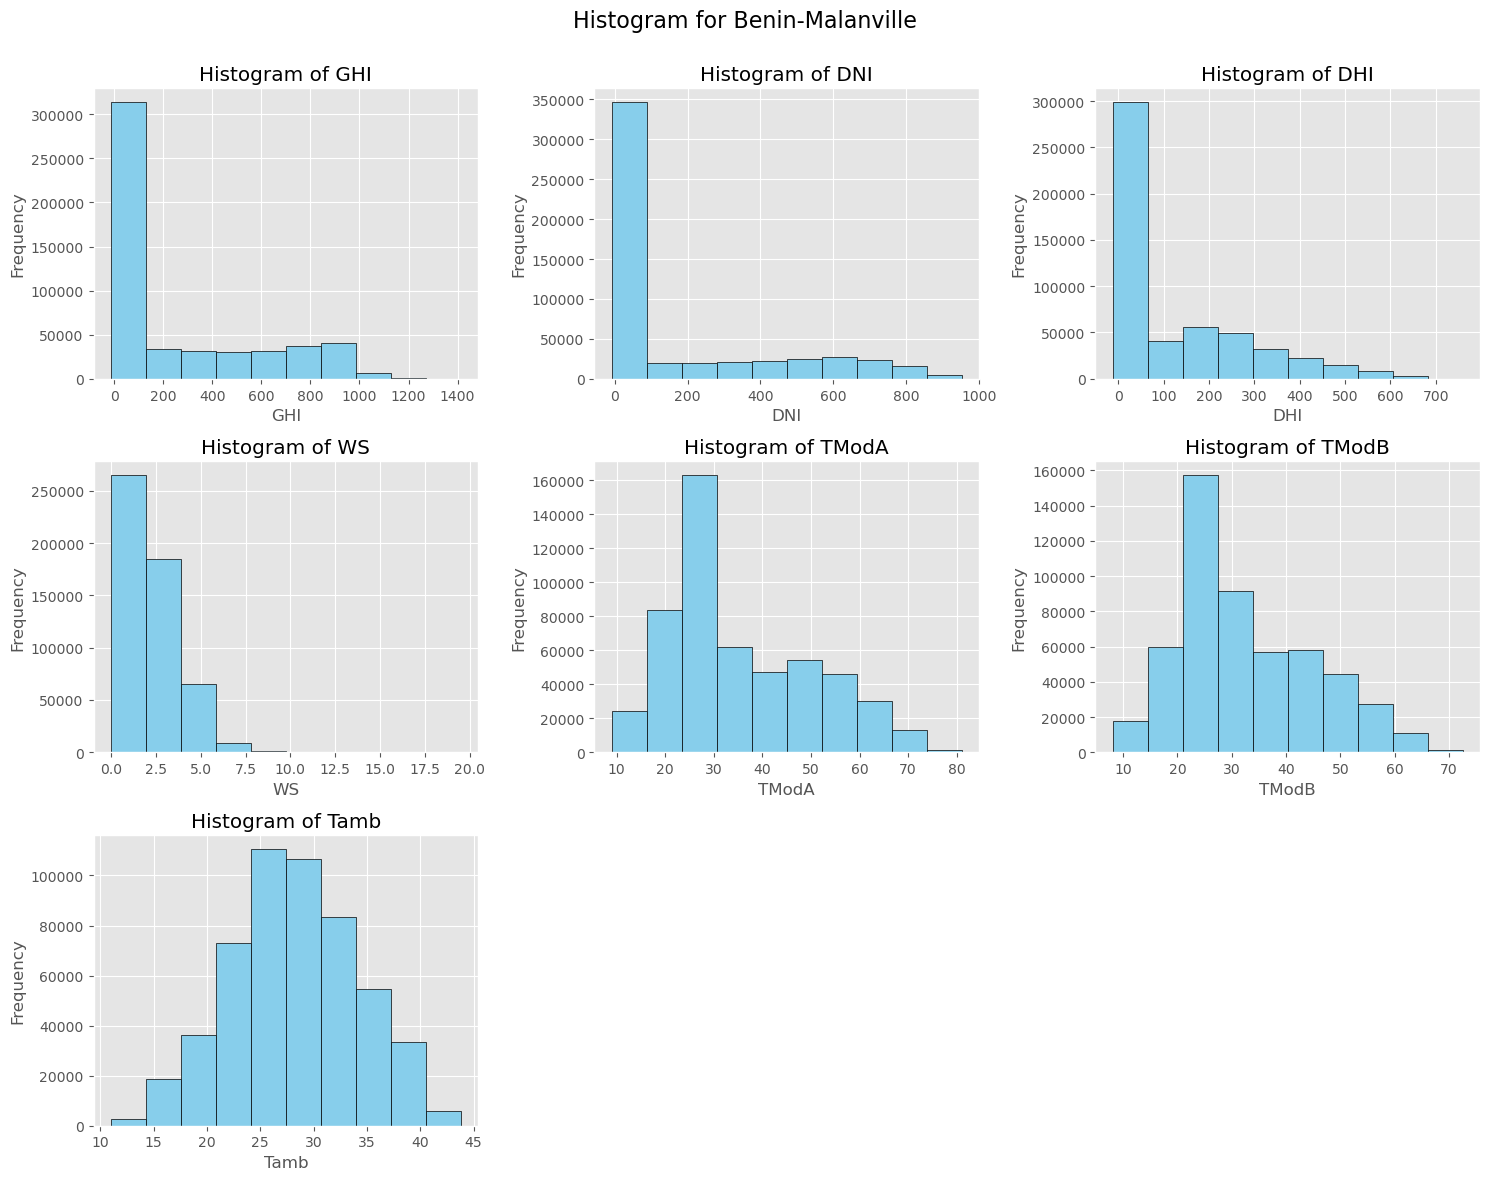

In [15]:
# List of variables to plot
variables = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB', 'Tamb']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()
fig.suptitle('Histogram for Benin-Malanville\n', fontsize=16)

# Plot each variable's histogram
for i, variable in enumerate(variables):
    axes[i].hist(df[variable], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Hide any unused subplots
for j in range(len(variables), 9):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

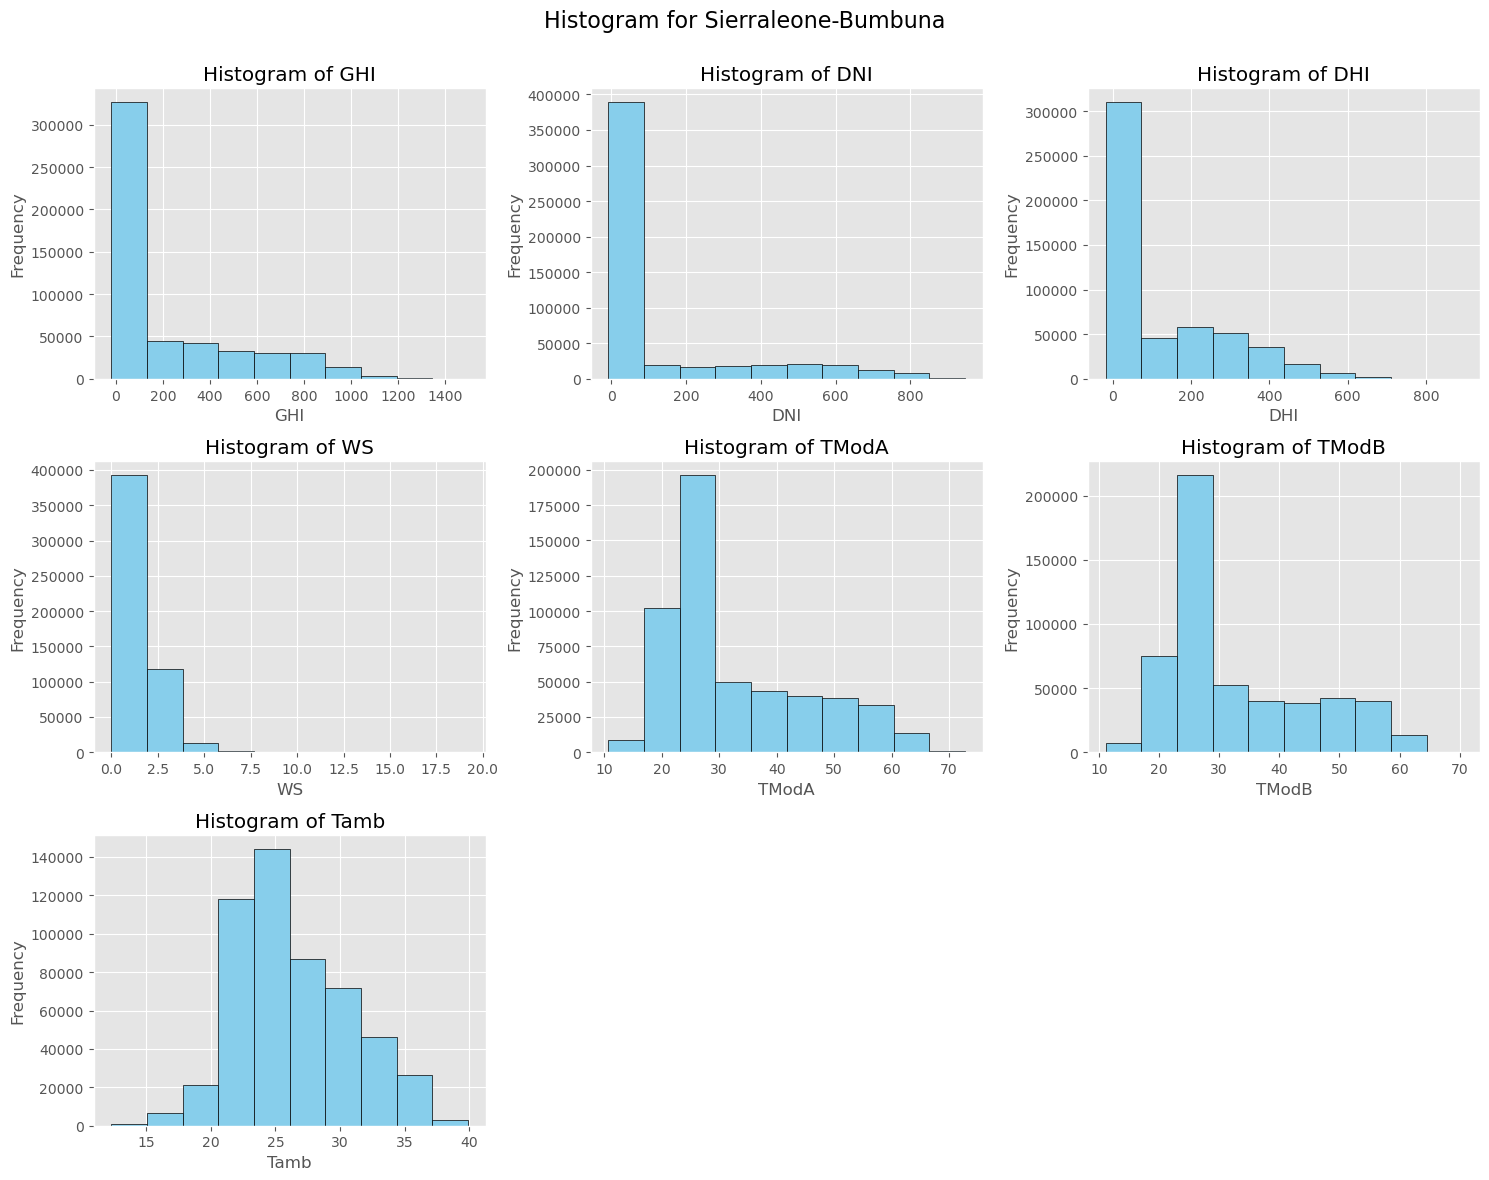

In [14]:
# List of variables to plot
variables = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB', 'Tamb']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()
fig.suptitle('Histogram for Sierraleone-Bumbuna\n', fontsize=16)

# Plot each variable's histogram
for i, variable in enumerate(variables):
    axes[i].hist(data[variable], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Hide any unused subplots
for j in range(len(variables), 9):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

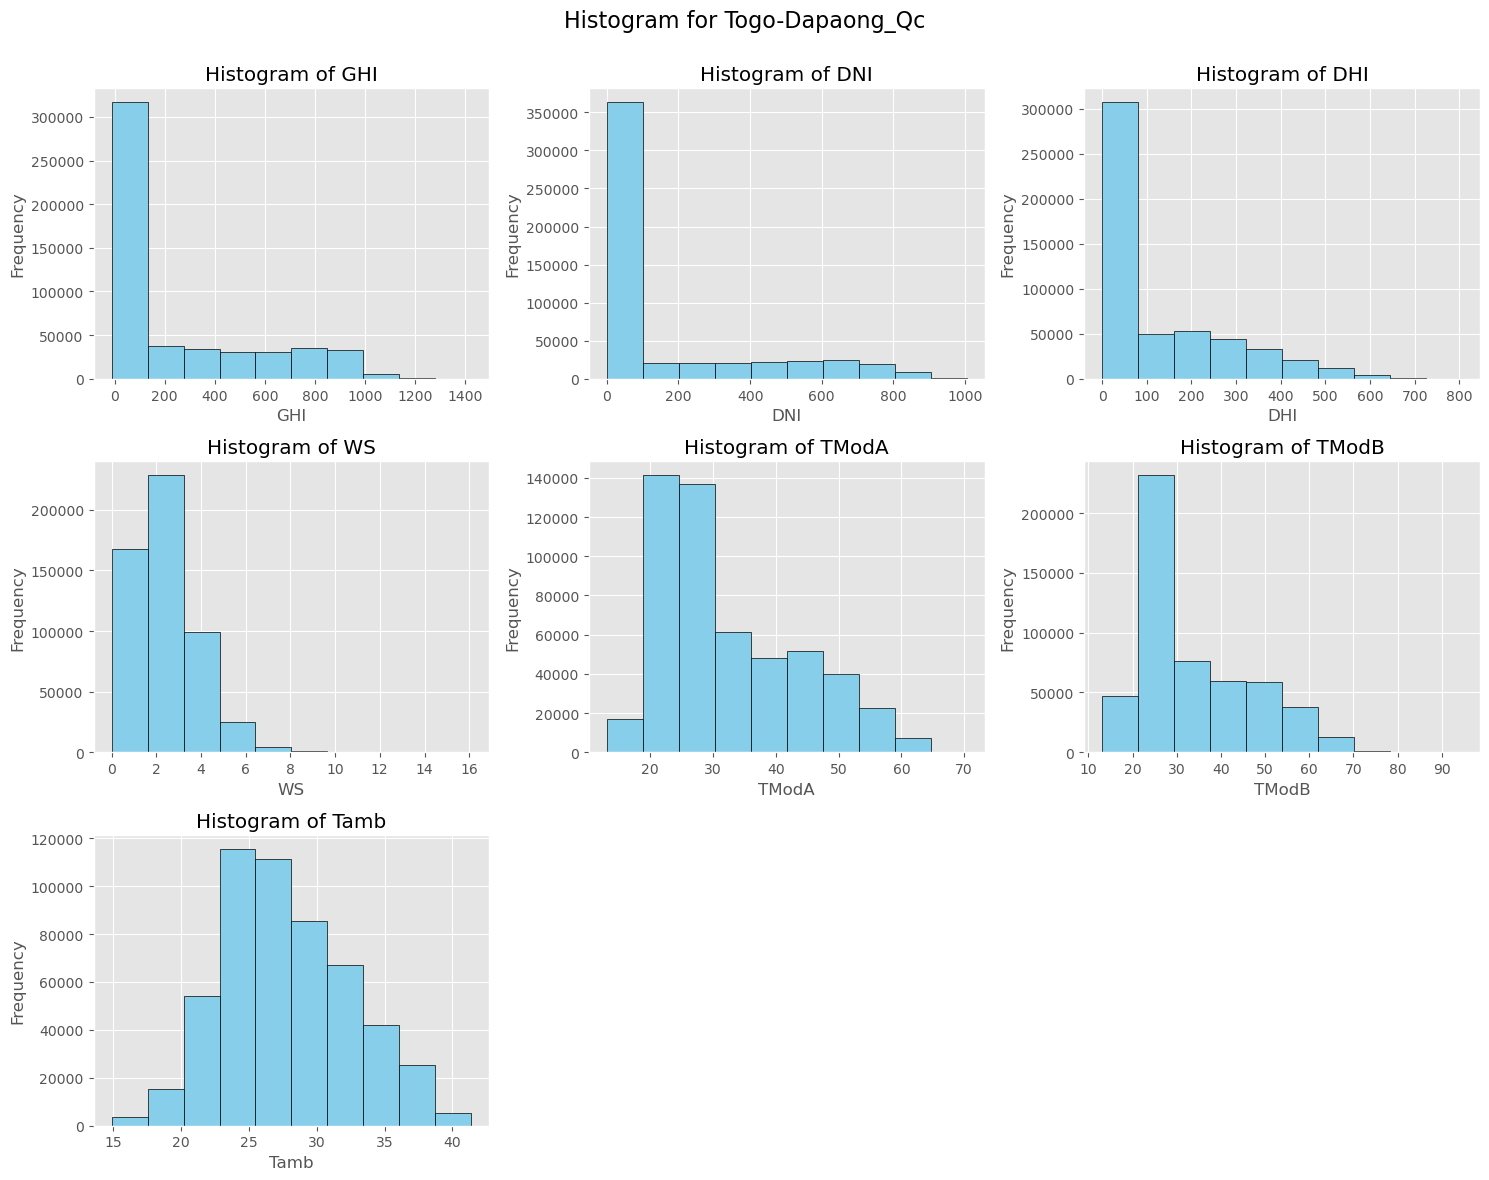

In [13]:
# List of variables to plot
variables = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB', 'Tamb']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()
fig.suptitle('Histogram for Togo-Dapaong_Qc\n', fontsize=16)

# Plot each variable's histogram
for i, variable in enumerate(variables):
    axes[i].hist(dt[variable], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Hide any unused subplots
for j in range(len(variables), 9):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

# Z-Score Analysis

In [42]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Calculate Z-scores
df_zscores = df[numeric_columns].apply(zscore)

# Identify data points with Z-scores above 3 or below -3 (considered outliers)
outliers = df_zscores[(df_zscores > 3) | (df_zscores < -3)].dropna(how='all')

# Show the Z-scores and highlight outliers
print("Z-Scores for Benin-Balanville:")
print(df_zscores)

print("Outliers (True indicates a significant outlier):")
print(outliers)

Z-Scores for Benin-Balanville:
             GHI       DNI       DHI      ModA      ModB      Tamb        RH  \
0      -0.730102 -0.639591 -0.733873 -0.723749 -0.723088 -0.334164  1.386100   
1      -0.729800 -0.639591 -0.733873 -0.723749 -0.723088 -0.334164  1.393224   
2      -0.729800 -0.639591 -0.733873 -0.723749 -0.723088 -0.334164  1.396786   
3      -0.729800 -0.639209 -0.733243 -0.723749 -0.723088 -0.334164  1.382537   
4      -0.729498 -0.639209 -0.733243 -0.723749 -0.723088 -0.334164  1.382537   
...          ...       ...       ...       ...       ...       ...       ...   
525595 -0.743088 -0.639209 -0.764120 -0.723749 -0.723088 -0.857433  1.560644   
525596 -0.743088 -0.639209 -0.763490 -0.723749 -0.723088 -0.857433  1.560644   
525597 -0.743088 -0.639209 -0.763490 -0.723749 -0.723088 -0.857433  1.564206   
525598 -0.743088 -0.639209 -0.763490 -0.723749 -0.723088 -0.857433  1.560644   
525599 -0.743088 -0.639209 -0.762860 -0.723749 -0.723088 -0.857433  1.560644   

        

In [44]:
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Calculate Z-scores
data_zscores = data[numeric_columns].apply(zscore)

# Identify data points with Z-scores above 3 or below -3 (considered outliers)
outliers = data_zscores[(data_zscores > 3) | (data_zscores < -3)].dropna(how='all')

# Show the Z-scores and highlight outliers
print("Z-Scores for Sierraleone-Bumbuna:")
print(data_zscores)

print("Outliers (True indicates a significant outlier):")
print(outliers)

Z-Scores for Sierraleone-Bumbuna:
             GHI       DNI       DHI      ModA      ModB      Tamb        RH  \
0      -0.678931 -0.532701 -0.720500 -0.686758 -0.685782 -1.004727  0.957623   
1      -0.678931 -0.532701 -0.720500 -0.686758 -0.685782 -1.004727  0.962496   
2      -0.678931 -0.532701 -0.720500 -0.686758 -0.685782 -1.004727  0.962496   
3      -0.678931 -0.532243 -0.720500 -0.686758 -0.685782 -1.004727  0.967369   
4      -0.678931 -0.532701 -0.720500 -0.686758 -0.685782 -1.004727  0.967369   
...          ...       ...       ...       ...       ...       ...       ...   
525595 -0.681946 -0.532701 -0.733712 -0.686758 -0.685782 -0.527303  1.001481   
525596 -0.682281 -0.532701 -0.734342 -0.686758 -0.685782 -0.527303  1.001481   
525597 -0.682281 -0.532701 -0.734971 -0.686758 -0.685782 -0.527303  1.001481   
525598 -0.682281 -0.533158 -0.736229 -0.686758 -0.685782 -0.550037  1.001481   
525599 -0.682281 -0.532701 -0.736858 -0.686758 -0.685782 -0.550037  1.001481   

     

In [45]:
numeric_columns = dt.select_dtypes(include=[np.number]).columns

# Calculate Z-scores
dt_zscores = dt[numeric_columns].apply(zscore)

# Identify data points with Z-scores above 3 or below -3 (considered outliers)
outliers = dt_zscores[(dt_zscores > 3) | (dt_zscores < -3)].dropna(how='all')

# Show the Z-scores and highlight outliers
print("Z-Scores for Togo-Dapaong_QC:")
print(dt_zscores)

print("Outliers (True indicates a significant outlier):")
print(outliers)

Z-Scores for Togo-Dapaong_QC:
             GHI       DNI       DHI     ModA      ModB      Tamb        RH  \
0      -0.718859 -0.602727 -0.743956 -0.71261 -0.713042 -0.620382  1.372085   
1      -0.718859 -0.602727 -0.743956 -0.71261 -0.713042 -0.620382  1.368611   
2      -0.718859 -0.602727 -0.743956 -0.71261 -0.713042 -0.620382  1.368611   
3      -0.718549 -0.602727 -0.743956 -0.71261 -0.713042 -0.620382  1.365136   
4      -0.718549 -0.602727 -0.743956 -0.71261 -0.713042 -0.620382  1.354711   
...          ...       ...       ...      ...       ...       ...       ...   
525595 -0.717309 -0.602727 -0.743956 -0.71261 -0.713042 -0.536313 -0.042155   
525596 -0.717619 -0.602727 -0.743956 -0.71261 -0.713042 -0.515296 -0.052579   
525597 -0.717929 -0.602727 -0.743956 -0.71261 -0.713042 -0.515296 -0.056054   
525598 -0.718239 -0.602727 -0.743956 -0.71261 -0.713042 -0.494279 -0.052579   
525599 -0.718549 -0.602727 -0.743956 -0.71261 -0.713042 -0.494279 -0.094277   

              WS    W

# Bubble Chart

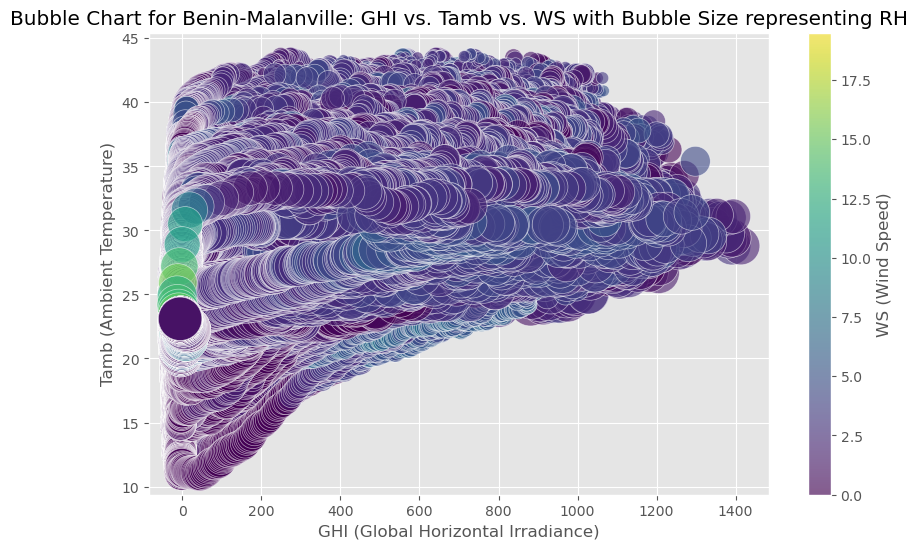

In [47]:
plt.figure(figsize=(10, 6))

# Scatter plot with bubble size based on RH or BP
plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, c=df['WS'], alpha=0.6, cmap='viridis', edgecolors='w')

# Labeling the axes
plt.xlabel('GHI (Global Horizontal Irradiance)')
plt.ylabel('Tamb (Ambient Temperature)')
plt.title('Bubble Chart for Benin-Malanville: GHI vs. Tamb vs. WS with Bubble Size representing RH')

# Add color bar to indicate WS values
plt.colorbar(label='WS (Wind Speed)')

# Display the plot
plt.show()

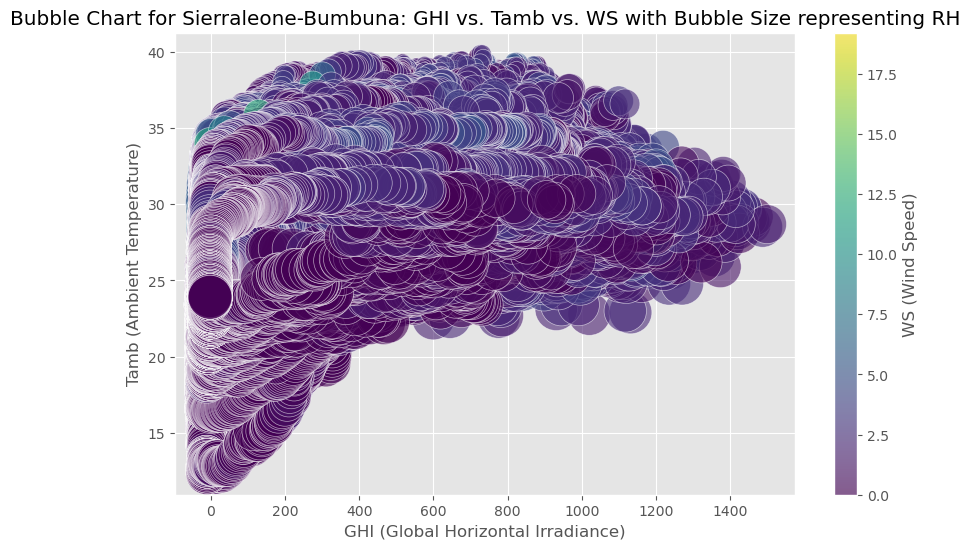

In [48]:
plt.figure(figsize=(10, 6))

# Scatter plot with bubble size based on RH or BP
plt.scatter(data['GHI'], data['Tamb'], s=data['RH']*10, c=data['WS'], alpha=0.6, cmap='viridis', edgecolors='w')

# Labeling the axes
plt.xlabel('GHI (Global Horizontal Irradiance)')
plt.ylabel('Tamb (Ambient Temperature)')
plt.title('Bubble Chart for Sierraleone-Bumbuna: GHI vs. Tamb vs. WS with Bubble Size representing RH')

# Add color bar to indicate WS values
plt.colorbar(label='WS (Wind Speed)')

# Display the plot
plt.show()

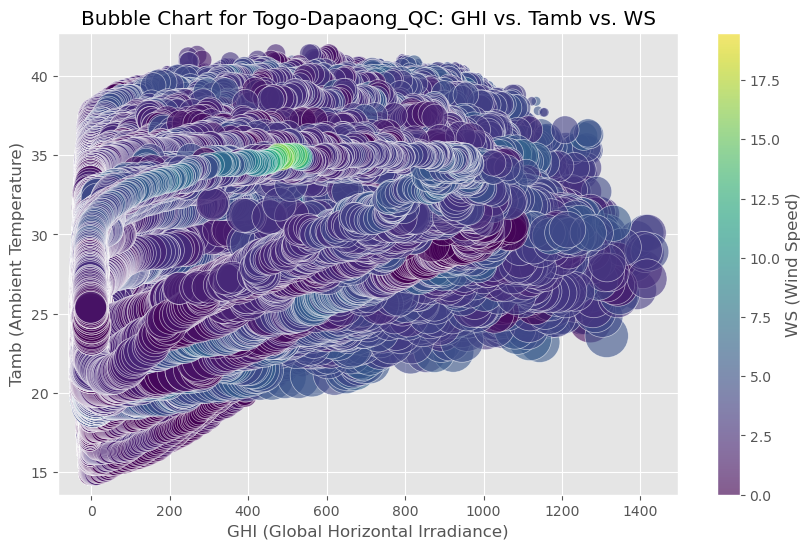

In [8]:
plt.figure(figsize=(10, 6))

# Scatter plot with bubble size based on RH or BP
plt.scatter(dt['GHI'], dt['Tamb'], s=dt['RH']*10, c=df['WS'], alpha=0.6, cmap='viridis', edgecolors='w')

# Labeling the axes
plt.xlabel('GHI (Global Horizontal Irradiance)')
plt.ylabel('Tamb (Ambient Temperature)')
plt.title('Bubble Chart for Togo-Dapaong_QC: GHI vs. Tamb vs. WS')

# Add color bar to indicate WS values
plt.colorbar(label='WS (Wind Speed)')

# Display the plot
plt.show()

# Data Cleaning